[*********************100%%**********************]  1 of 1 completed


C:\Users\SSS\AppData\Local\Temp\ipykernel_13092\658809271.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  live_df = live_df.append(live_data.iloc[-1])  # Append the latest data point


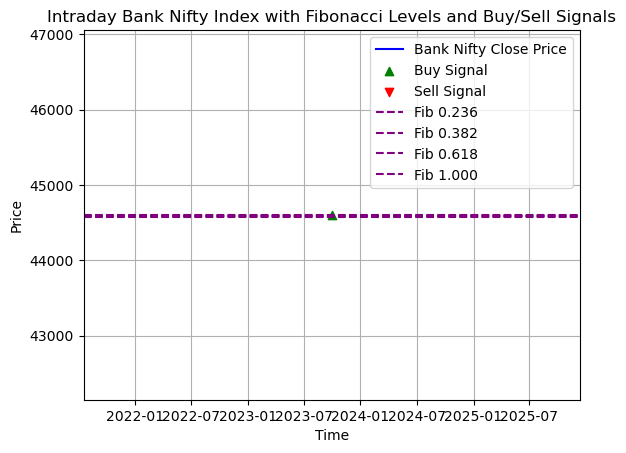

[*********************100%%**********************]  1 of 1 completed


C:\Users\SSS\AppData\Local\Temp\ipykernel_13092\658809271.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  live_df = live_df.append(live_data.iloc[-1])  # Append the latest data point


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the ticker symbol for Bank Nifty (ticker symbol for Nifty Bank Index on Yahoo Finance)
symbol = "^NSEBANK"

# Initialize an empty DataFrame for live data
live_df = pd.DataFrame()

# Define the Fibonacci retracement levels
def calculate_fibonacci_levels(df):
    high = df["High"].max()
    low = df["Low"].min()
    diff = high - low

    levels = {
        "0.236": high - (0.236 * diff),
        "0.382": high - (0.382 * diff),
        "0.618": high - (0.618 * diff),
        "1.000": low + (1.000 * diff),
    }

    return levels

# Create a live candlestick chart with buy and sell markers
fig, ax = plt.subplots()

# Continuously update and analyze data
while True:
    # Fetch real-time data
    live_data = yf.download(symbol, period="1d", interval="5m")
    
    # If data is available, append it to the live_df
    if not live_data.empty:
        live_df = live_df.append(live_data.iloc[-1])  # Append the latest data point
    
        # Calculate Fibonacci levels for live data
        fibonacci_levels = calculate_fibonacci_levels(live_df)
        
        # Clear the previous plot
        ax.clear()
        
        # Plot candlestick chart for live data
        ax.plot(live_df.index, live_df["Close"], label="Bank Nifty Close Price", color="blue")
        
        # Plot Buy markers in green
        buy_markers = live_df[live_df["Close"] >= fibonacci_levels["0.618"]]
        ax.scatter(buy_markers.index, buy_markers["Close"], marker="^", color="green", label="Buy Signal")
        
        # Plot Sell markers in red
        sell_markers = live_df[live_df["Close"] <= fibonacci_levels["0.382"]]
        ax.scatter(sell_markers.index, sell_markers["Close"], marker="v", color="red", label="Sell Signal")
        
        # Plot Fibonacci levels
        for level, price in fibonacci_levels.items():
            ax.axhline(price, color="purple", linestyle="--", label=f"Fib {level}")
        
        ax.set_title("Intraday Bank Nifty Index with Fibonacci Levels and Buy/Sell Signals")
        ax.set_xlabel("Time")
        ax.set_ylabel("Price")
        ax.legend()
        ax.grid(True)
        
        # Display the live chart
        plt.pause(300)  # Pause for 5 minutes before updating again (adjust as needed)
    
plt.show()
